## dQ/dV Plotting

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

### Plotting every cycle of a specific cell:

#### First check the file:

In [4]:
file_path = r"C:FILEPATH.txt" #Make sure to use the exported .txt file with ALL CYCLES not an individual cycle dataset.
df = pd.read_csv(file_path, sep="\t", header=0) #header =2 if you have removed the 2 lines of EC-lab processing text (produced on creating a .txt file). Otherwise header =0.
df.head()

,time/s,cycle number,Ewe/V,I/mA,d(Q-Qo)/dE/mA.h/V,Unnamed: 5
0,0.000000,0.0,-0.048261,0.0,0.0,NaN
1,59.999998,0.0,-0.048147,0.0,0.0,NaN
2,119.999997,0.0,-0.048032,0.0,0.0,NaN
3,179.999995,0.0,-0.047994,0.0,0.0,NaN
4,239.999994,0.0,-0.048128,0.0,0.0,NaN


#### Now you can plot every cycle of that cell:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


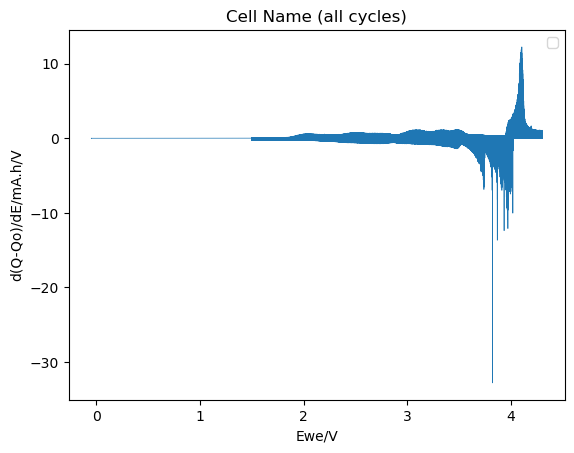

In [5]:


# Define the columns for x and y
x_column = "Ewe/V"
y_column = "d(Q-Qo)/dE/mA.h/V"
    
#     # Plot the data
plt.plot(df[x_column], df[y_column], linewidth=0.5) #label=f'Cycle {cycle_number}'

plt.xlabel('Ewe/V')
plt.ylabel('d(Q-Qo)/dE/mA.h/V')
plt.title('Cell Name (all cycles)')
plt.legend()
plt.show()


#### Plot every cycle in a different colour:

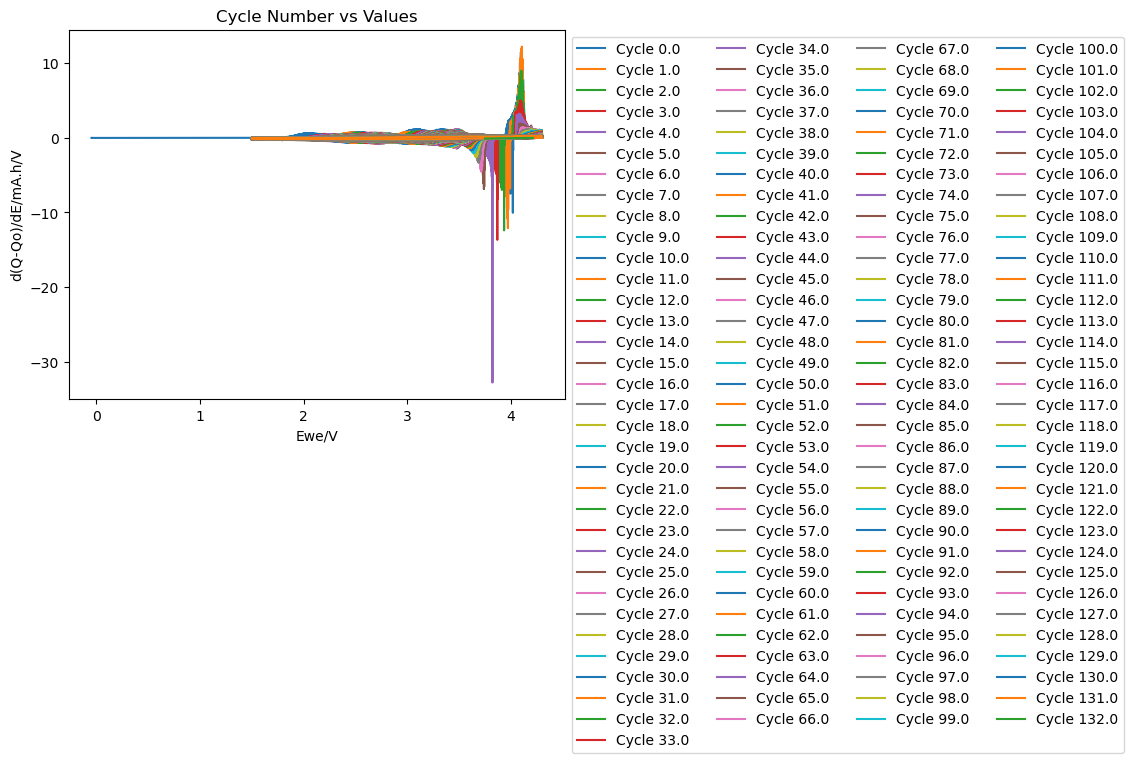

In [9]:
# Define the columns for x and y
x_column = "Ewe/V"
y_column = "d(Q-Qo)/dE/mA.h/V"

# Get unique cycle numbers
unique_cycle_numbers = df["cycle number"].unique()
#unique_cycle_numbers = [25]

# Plotting
plt.figure()

for cycle_number in unique_cycle_numbers:
    # Filter rows by cycle number
    filtered_df = df[df["cycle number"] == cycle_number]
    
    # Plot the data
    plt.plot(filtered_df[x_column], filtered_df[y_column], label=f'Cycle {cycle_number}')

plt.xlabel('Ewe/V')
plt.ylabel('d(Q-Qo)/dE/mA.h/V')
plt.title('Cycle Number vs Values')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=4)
plt.show()

## dQ/dV single cycle plots

#### Now we use the .py class file which has the plotting settings premade:
##### Make sure to use the file which has a single cycle extracted

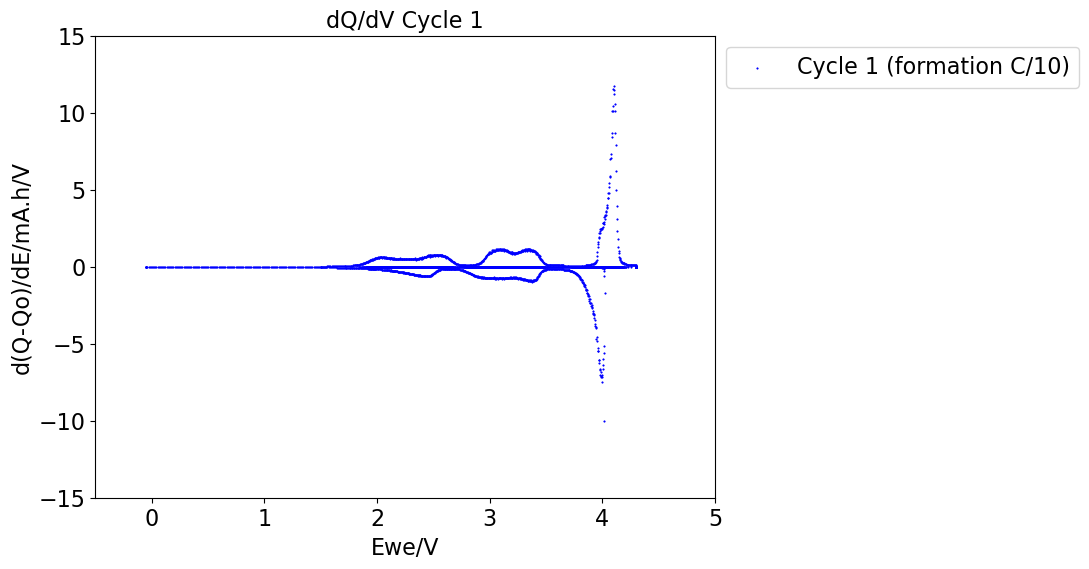

In [11]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
file_path = r"C:FILEPATH.txt" #single extracted cycle .txt file
dataset_name = "Muon P2 "
plot_title = "dQdV Plot"
legend_labels = ["Cycle 1 (formation C/10)"] 
plot = dQdVPlotter(file_path = file_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            legend_labels=legend_labels)
plot.dqdv_single_cycle()


#### Now to plot multiple extracted cycles with different colours use the folder path below
##### The folder path will plot the datasets in the order that they sit in the folder - order these if needed in your folder.

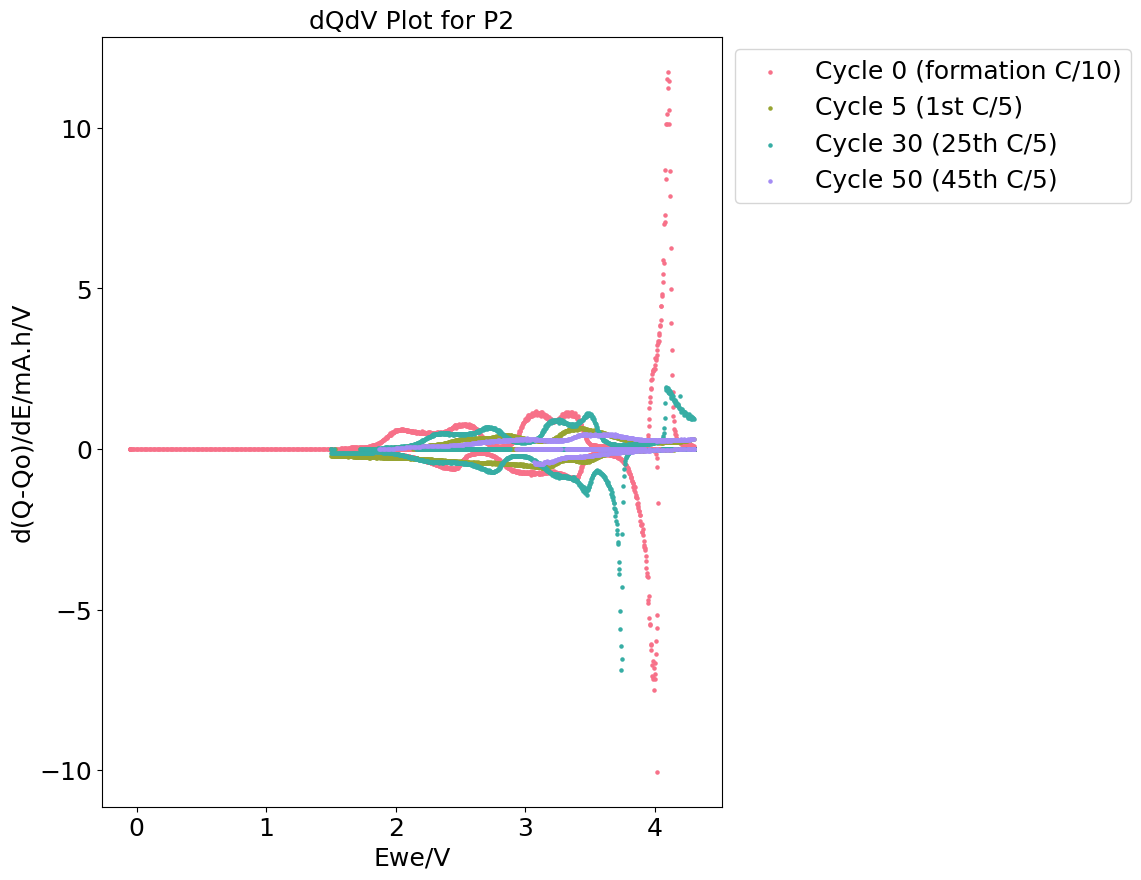

In [21]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
folder_path = rf"C:FOLDER PATH" #Not .txt file here
dataset_name = "Muon P2 Differential Capacity Plot"
plot_title = "dQdV Plot for P2"
figsize = (8, 10)
fontsize = 18
xlim = (-0.5, 5.5)
ylim = (-10.5, 12.5)
legend_labels = ["Cycle 0 (formation C/10)", "Cycle 5 (1st C/5)", "Cycle 30 (25th C/5)", "Cycle 50 (45th C/5)"] #have as many legend labels as number of .txt files in the folder path
plot = dQdVPlotter(folder_path = folder_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim,
                            legend_labels=legend_labels)
plot.dqdv_multiple_cycles()


## dQdV Plotting with Neware Datasets

### Check the file - filtered neware data set

In [2]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter

file_path = r".csv" #add in just csv file which has already been through processing in the Neware software using the filtered data instructions highlighted earlier in the readme file.
reader = dQdVPlotter(file_path)
reader.read_neware_data()

      Voltage(V)  dQ/dV(mAh/V)  Voltage(V).1  dQ/dV(mAh/V).1  Voltage(V).2  \
0        -0.0402        0.0000        1.5960          0.0000        1.5931   
1        -0.0227        0.0629        1.6077          0.0629        1.6037   
2        -0.0066        0.0839        1.6193          0.1258        1.6144   
3         0.0177        0.1258        1.6293          0.3146        1.6245   
4         0.0323        0.1468        1.6393          1.9299        1.6326   
...          ...           ...           ...             ...           ...   
7686      1.5045     6354.0685           NaN             NaN           NaN   
7687      1.5032     6356.1670           NaN             NaN           NaN   
7688      1.5019     6358.2662           NaN             NaN           NaN   
7689      1.5004     6360.3642           NaN             NaN           NaN   
7690      1.5000     6360.8474           NaN             NaN           NaN   

      dQ/dV(mAh/V).2  Voltage(V).3  dQ/dV(mAh/V).3  Voltage(V).

### dQdV Plot for 1 cycle - Raw not filtered data set

In [14]:
file_path = r".csv"
df = pd.read_csv(file_path, header=0)
print(df)

       Voltage(V)  dQ/dV(mAh/V)
0         -0.1193           0.0
1         -0.1194           0.0
2         -0.1196           0.0
3         -0.1196           0.0
4         -0.1197           0.0
...           ...           ...
12082      1.5868           0.0
12083      1.5871           0.0
12084      1.5875           0.0
12085      1.5879           0.0
12086      1.5882           0.0

[12087 rows x 2 columns]


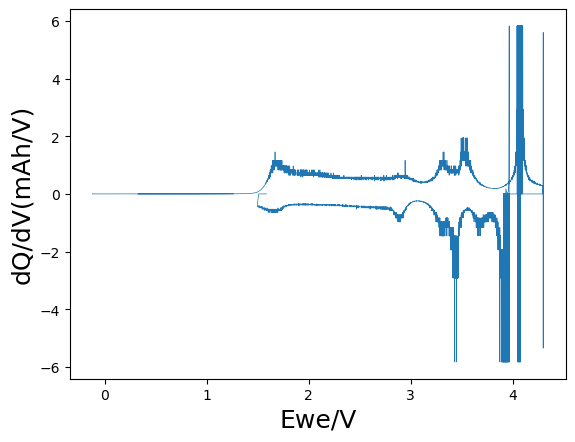

In [16]:
plt.plot(df["Voltage(V)"], df["dQ/dV(mAh/V)"], label="dQ/dV vs Voltage", linewidth = 0.5)
plt.xlabel("Ewe/V", fontsize = 18)
plt.ylabel("dQ/dV(mAh/V)", fontsize = 18)
plt.show()

### Single Cycle Neware (Filtered Neware Data)

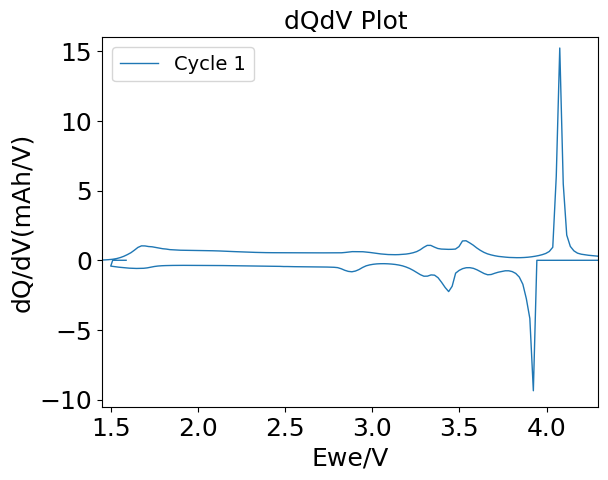

In [6]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
file_path = r"" #.csv file path goes here
dataset_name = "Differential Capacity Plot"
plot_title = "dQdV Plot " #add your title here
legend_labels = ["Cycle 1"] #add the cycle number here. Make sure to only have 1 label as you only have 1 data set.
#figsize = (8, 10)
fontsize = 18 #this will control all fontsizes on the plot
xlim = (1.45, 4.295) #this controls your x axis range
ylim = (-10.5, 16) #this controls your y axis range

plot = dQdVPlotter(file_path = file_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim,
                            legend_labels=legend_labels)
plot.dqdv_single_cycle_neware()

### Neware - Multiple Cycles (from folder path)

#### To note: this only works for individual cycles which have been processed via the Neware software (using data filter method as highlighted in readme). This will not work if you export csv file which holds every single cycle from the cell exported as V v dqdv.

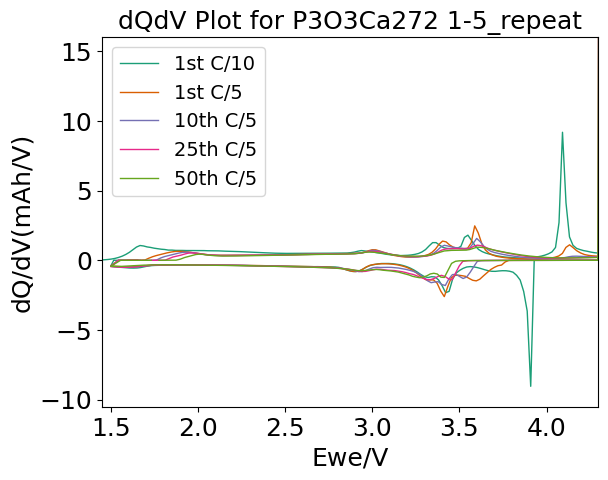

In [124]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
folder_path = rf"" #Not .csv file here
dataset_name = "Differential Capacity Plot"
plot_title = "dQdV Plot"
figsize = (8, 10)
#figsize = (8, 10)
fontsize = 18 #this will control all fontsizes on the plot
xlim = (1.45, 4.295) #this controls your x axis range
ylim = (-10.5, 16) #this controls your y axis range
legend_labels = ["1st C/10", "1st C/5", "10th C/5", "25th C/5", "50th C/5"] #have as many legend labels as number of .txt files in the folder path

plot = dQdVPlotter(folder_path = folder_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim,
                            legend_labels=legend_labels)
plot.dqdv_multiple_cycles_neware()

### Neware - Plot every cycle

##### This can be used when you use the data filter as for above neware datasets. But this time when you export the data you also need to tick the box for Cycle Index.

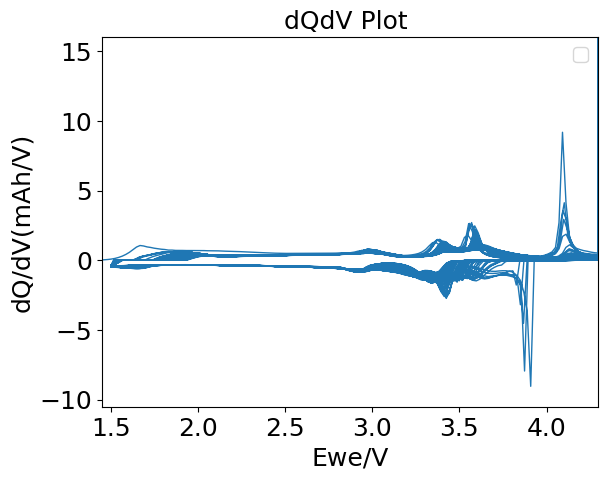

In [3]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
file_path = rf".csv" #.csv file path here
dataset_name = "Differential Capacity Plot "
plot_title = "dQdV Plot "
figsize = (8, 10)
#figsize = (8, 10)
fontsize = 18 #this will control all fontsizes on the plot
xlim = (1.45, 4.295) #this controls your x axis range
ylim = (-10.5, 16) #this controls your y axis range
legend_labels = ["1-5"] #have as many legend labels as number of .txt files in the folder path

plot = dQdVPlotter(file_path = file_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim) #legend_labels=legend_labels
plot.dqdv_all_cycles_neware()

#### For Plotting every neware differential capacity cycle in one file using a sequential colour scheme:

###### Note this currently is just to check your data sets. I have not figured out the best way to plot every cycle without the being connected to the next hence why it is formatted currently as a scatter plot to avoid every cycle being connected.

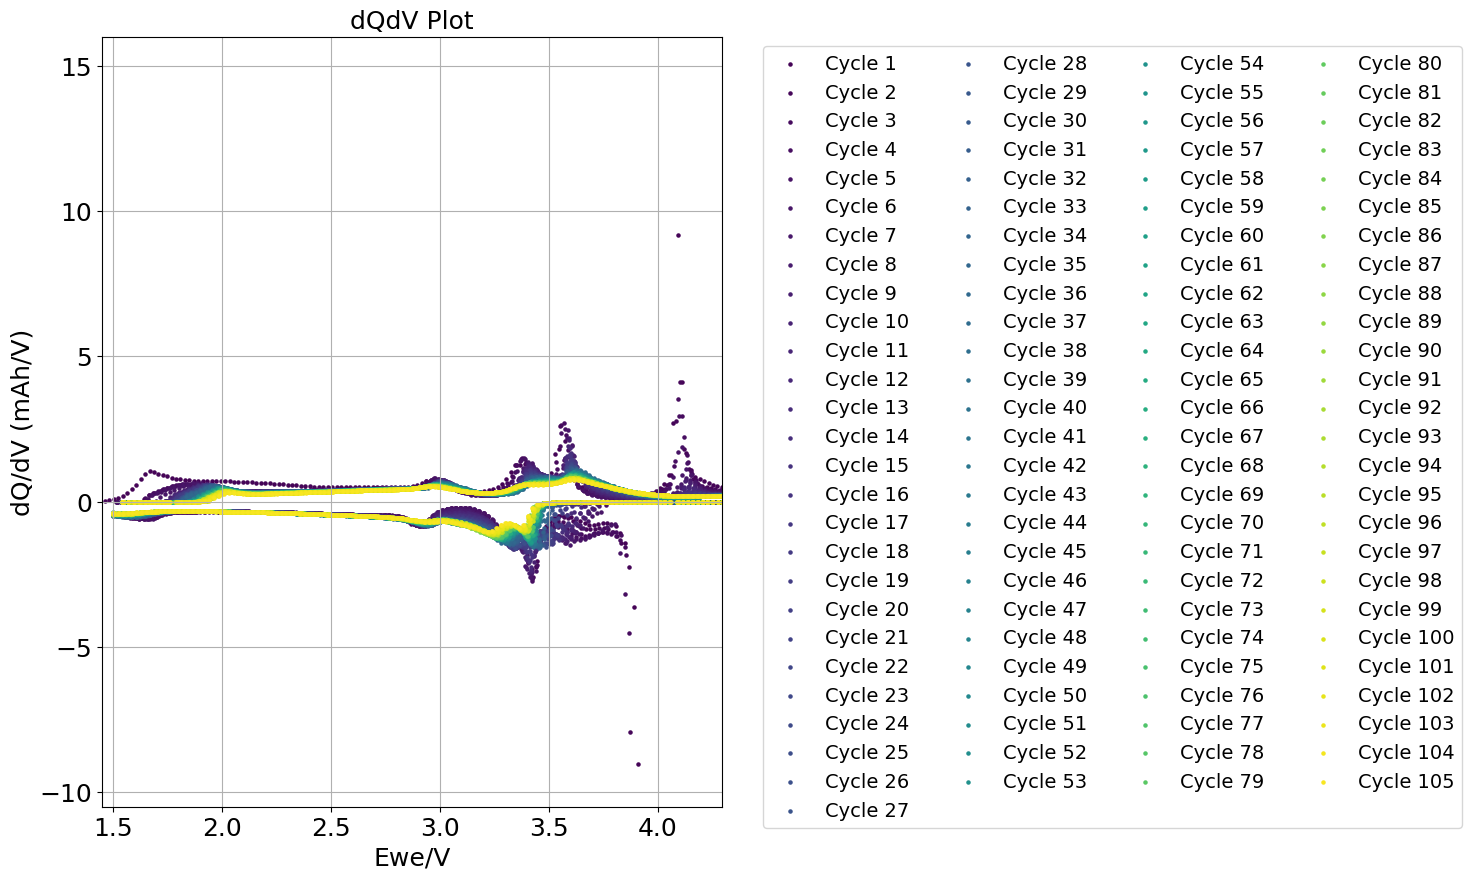

In [5]:
from battery_characterisation_tool.echem_plotting.dQdV_plotting import dQdVPlotter
file_path = rf"" #.csv file here
dataset_name = "Differential Capacity Plot "
plot_title = "dQdV Plot"
figsize = (8, 10)
#figsize = (8, 10)
fontsize = 18 #this will control all fontsizes on the plot
xlim = (1.45, 4.295) #this controls your x axis range
ylim = (-10.5, 16) #this controls your y axis range

plot = dQdVPlotter(file_path = file_path,
                            dataset_name = dataset_name,
                            plot_title = plot_title,
                            figsize = figsize,
                            fontsize = fontsize,
                            xlim = xlim,
                            ylim = ylim) 
plot.dqdv_all_cycles_neware_colour()